In [1]:
!pip install graphviz #conda install -c anaconda graphviz

In [2]:
import pandas as pd
from sklearn import tree
import graphviz 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df= pd.get_dummies(data=df, columns=[ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
X=train.drop(['class'],axis=1)

In [7]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1564,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6012,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
6474,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
7952,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
5342,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4895,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7618,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
834,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [8]:
y=train[['class']]

In [9]:
y

,class
1564,e
6012,p
6474,p
7952,e
5342,p
...,...
7868,p
4895,p
7618,p
834,e


In [36]:
clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=3) # criterion='entropy'  , clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

[Text(167.40000000000003, 190.26, 'X[27] <= 0.5\ngini = 0.498\nsamples = 1625\nvalue = [862, 763]'),
 Text(66.96000000000001, 135.9, 'X[21] <= 0.5\ngini = 0.311\nsamples = 923\nvalue = [178, 745]'),
 Text(33.480000000000004, 81.53999999999999, 'gini = 0.0\nsamples = 647\nvalue = [0, 647]'),
 Text(100.44000000000001, 81.53999999999999, 'X[96] <= 0.5\ngini = 0.458\nsamples = 276\nvalue = [178, 98]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.318\nsamples = 222\nvalue = [178, 44]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(267.84000000000003, 135.9, 'X[100] <= 0.5\ngini = 0.05\nsamples = 702\nvalue = [684, 18]'),
 Text(234.36, 81.53999999999999, 'X[63] <= 0.5\ngini = 0.02\nsamples = 691\nvalue = [684, 7]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 683\nvalue = [683, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(301.32000000000005, 81.5

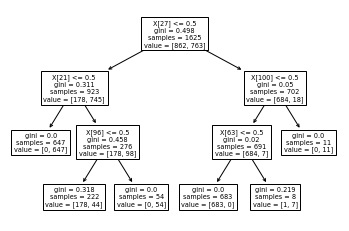

In [37]:
tree.plot_tree(clf) 

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("mushroom") 

'mushroom.pdf'

In [39]:
a=['e', 'p']

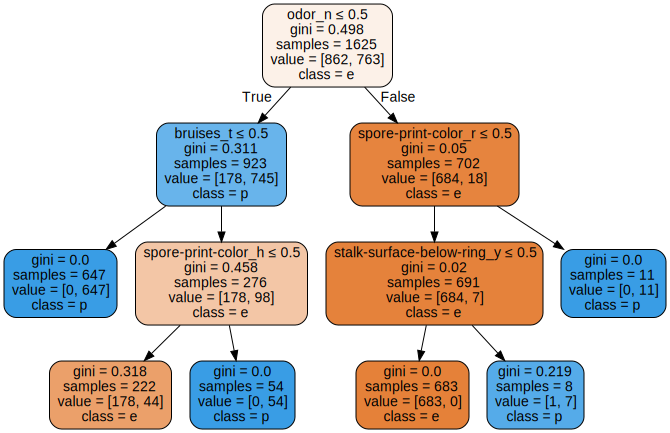

In [40]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns,class_names=a,filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [41]:
X=test.drop(['class'],axis=1)
y=test[['class']]

In [42]:
clf.predict(X, check_input=True)

array(['e', 'p', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [43]:
clf.score(X, y)

0.9723076923076923